In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, GRU, Dropout
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, Flatten
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from tabulate import tabulate
import matplotlib.dates as mdates
from tensorflow.keras.utils import plot_model

In [ ]:
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3520,07-05-2024,63162.761720,64390.457030,62285.980470,62334.816410,62334.816410,2.593073e+10
3521,08-05-2024,62332.640630,62986.085940,60877.128910,61187.941410,61187.941410,2.608817e+10
3522,09-05-2024,61191.199220,63404.914060,60648.074220,63049.960940,63049.960940,2.545334e+10
3523,10-05-2024,63061.996090,63437.750000,60317.429690,60636.000000,60636.000000,2.910376e+10


<ipython-input-13-445cf313746a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


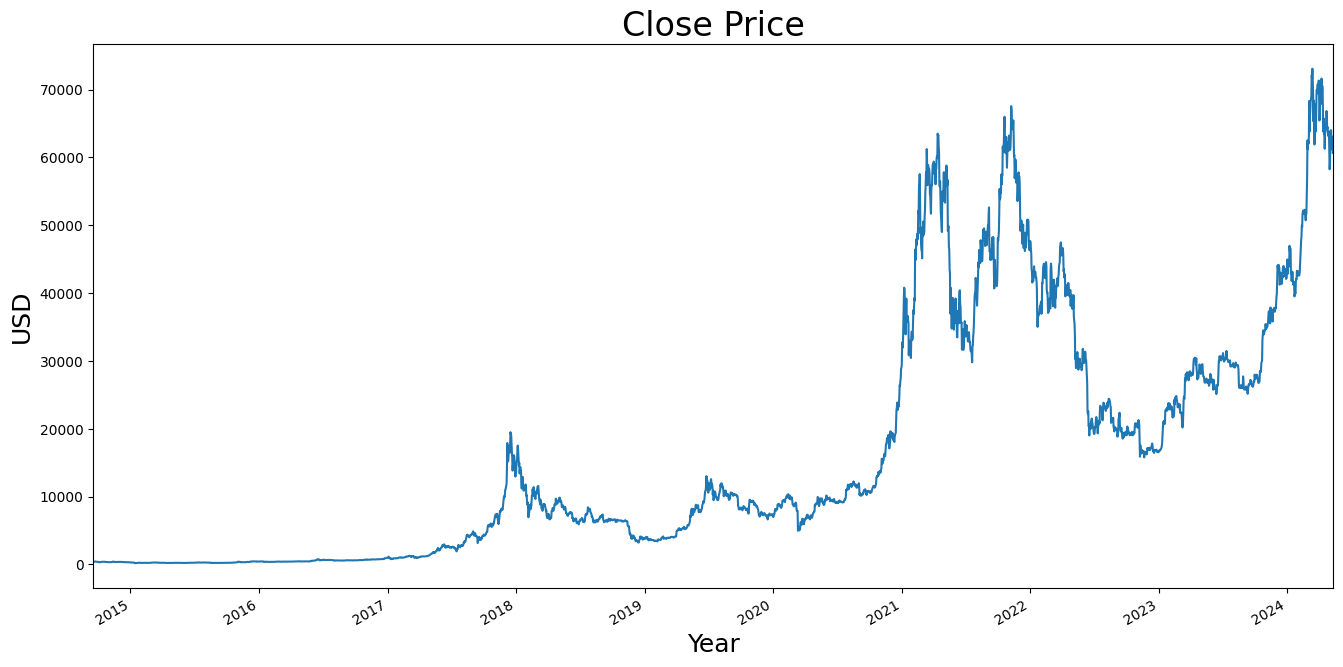

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(16, 8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('USD', fontsize=18)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xlim(df['Date'].min(), df['Date'].max())

plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.8)
validation_data_len = len(dataset) - training_data_len

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.86237591],
       [0.82926504],
       [0.83142827]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
validation_data = scaled_data[training_data_len:, :]

X_train = []
y_train = []

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i - sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_validation, y_validation = create_sequences(validation_data, sequence_length)

In [ ]:
len(X_train)

2760

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(2760, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2760, 60, 1)

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60: i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#RNN Model

model_1 = Sequential()
model_1.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_1.add(Dropout(0.2))
model_1.add(SimpleRNN(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

In [ ]:
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 216s 76ms/step - loss: 0.0049 - val_loss: 4.1161e-04
Epoch 2/10
2760/2760 [==============================] - 211s 76ms/step - loss: 0.0012 - val_loss: 4.0288e-04
Epoch 3/10
2760/2760 [==============================] - 210s 76ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 4/10
2760/2760 [==============================] - 209s 76ms/step - loss: 0.0010 - val_loss: 4.4647e-04
Epoch 5/10
2760/2760 [==============================] - 212s 77ms/step - loss: 6.1519e-04 - val_loss: 7.5886e-04
Epoch 6/10
2760/2760 [==============================] - 208s 75ms/step - loss: 7.7607e-04 - val_loss: 5.6400e-04
Epoch 7/10
2760/2760 [==============================] - 215s 78ms/step - loss: 6.4511e-04 - val_loss: 7.7129e-04
Epoch 8/10
2760/2760 [==============================] - 218s 79ms/step - loss: 8.6753e-04 - val_loss: 7.0206e-04
Epoch 9/10
2760/2760 [==============================] - 211s 77ms/step - loss: 5.5569e-04 - val_loss: 0.0011
Epoch 1

In [ ]:
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

23/23 [==============================] - 0s 11ms/step


705

In [ ]:
#LSTM Model

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_2.add(Dropout(0.2))
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mse')


In [ ]:
history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 30s 9ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 2/10
2760/2760 [==============================] - 25s 9ms/step - loss: 8.4776e-04 - val_loss: 8.7078e-04
Epoch 3/10
2760/2760 [==============================] - 25s 9ms/step - loss: 9.0523e-04 - val_loss: 8.6140e-04
Epoch 4/10
2760/2760 [==============================] - 25s 9ms/step - loss: 6.2042e-04 - val_loss: 4.4805e-04
Epoch 5/10
2760/2760 [==============================] - 25s 9ms/step - loss: 5.8017e-04 - val_loss: 0.0024
Epoch 6/10
2760/2760 [==============================] - 25s 9ms/step - loss: 5.0550e-04 - val_loss: 0.0027
Epoch 7/10
2760/2760 [==============================] - 23s 8ms/step - loss: 5.6330e-04 - val_loss: 5.2525e-04
Epoch 8/10
2760/2760 [==============================] - 25s 9ms/step - loss: 5.2468e-04 - val_loss: 0.0014
Epoch 9/10
2760/2760 [==============================] - 26s 9ms/step - loss: 4.6860e-04 - val_loss: 9.8221e-04
Epoch 10/10
2760/2760

In [ ]:
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

23/23 [==============================] - 1s 4ms/step


705

In [ ]:
#CNN Model

model_3 = Sequential()
model_3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_3.add(MaxPooling1D(pool_size=2))
model_3.add(Dropout(0.2))
model_3.add(Flatten())
model_3.add(Dense(50, activation='relu'))
model_3.add(Dense(1))

In [ ]:
model_3.compile(optimizer='adam', loss='mse')

history_3 = model_3.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 12s 4ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 2/10
2760/2760 [==============================] - 10s 4ms/step - loss: 0.0018 - val_loss: 0.0059
Epoch 3/10
2760/2760 [==============================] - 9s 3ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 4/10
2760/2760 [==============================] - 10s 4ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 5/10
2760/2760 [==============================] - 10s 3ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 6/10
2760/2760 [==============================] - 9s 3ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/10
2760/2760 [==============================] - 10s 4ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 8/10
2760/2760 [==============================] - 10s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/10
2760/2760 [==============================] - 11s 4ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 10/10
2760/2760 [==============================] - 9s 3ms/step - loss

In [ ]:
predictions_3 = model_3.predict(X_test)
predictions_3 = scaler.inverse_transform(predictions_3)
len(predictions_3)

23/23 [==============================] - 0s 2ms/step


705

In [ ]:
#CNN-LSTM Model

model_4 = Sequential()
model_4.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_4.add(MaxPooling1D(pool_size=2))
model_4.add(LSTM(50, return_sequences=True))
model_4.add(Dropout(0.2))
model_4.add(LSTM(50, return_sequences=False))
model_4.add(Dense(25))
model_4.add(Dense(1))

model_4.compile(optimizer='adam', loss='mse')

In [ ]:
model_4.compile(optimizer='adam', loss='mse')

history_4 = model_4.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 28s 8ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 2/10
2760/2760 [==============================] - 24s 9ms/step - loss: 0.0012 - val_loss: 7.5505e-04
Epoch 3/10
2760/2760 [==============================] - 23s 8ms/step - loss: 0.0012 - val_loss: 7.6924e-04
Epoch 4/10
2760/2760 [==============================] - 24s 9ms/step - loss: 9.0910e-04 - val_loss: 0.0019
Epoch 5/10
2760/2760 [==============================] - 23s 8ms/step - loss: 7.6327e-04 - val_loss: 8.3387e-04
Epoch 6/10
2760/2760 [==============================] - 23s 8ms/step - loss: 6.8640e-04 - val_loss: 6.4260e-04
Epoch 7/10
2760/2760 [==============================] - 23s 8ms/step - loss: 6.1747e-04 - val_loss: 0.0020
Epoch 8/10
2760/2760 [==============================] - 22s 8ms/step - loss: 5.9159e-04 - val_loss: 0.0012
Epoch 9/10
2760/2760 [==============================] - 23s 8ms/step - loss: 5.2278e-04 - val_loss: 3.8333e-04
Epoch 10/10
2760/2760 [======

In [ ]:
predictions_4 = model_4.predict(X_test)
predictions_4 = scaler.inverse_transform(predictions_4)
len(predictions_4)

23/23 [==============================] - 1s 3ms/step


705

In [ ]:
#Bi-LSTM Model

model_5 = Sequential()
model_5.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model_5.add(Dropout(0.2))
model_5.add(Bidirectional(LSTM(50, return_sequences=False)))
model_5.add(Dense(25))
model_5.add(Dense(1))

model_5.compile(optimizer='adam', loss='mse')

In [ ]:
history_5 = model_5.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 52s 16ms/step - loss: 0.0014 - val_loss: 3.6904e-04
Epoch 2/10
2760/2760 [==============================] - 43s 16ms/step - loss: 7.3297e-04 - val_loss: 2.8607e-04
Epoch 3/10
2760/2760 [==============================] - 43s 16ms/step - loss: 6.7911e-04 - val_loss: 3.2539e-04
Epoch 4/10
2760/2760 [==============================] - 43s 16ms/step - loss: 4.8204e-04 - val_loss: 4.1990e-04
Epoch 5/10
2760/2760 [==============================] - 45s 16ms/step - loss: 5.4625e-04 - val_loss: 4.3614e-04
Epoch 6/10
2760/2760 [==============================] - 46s 17ms/step - loss: 4.6972e-04 - val_loss: 2.6550e-04
Epoch 7/10
2760/2760 [==============================] - 44s 16ms/step - loss: 4.2757e-04 - val_loss: 0.0082
Epoch 8/10
2760/2760 [==============================] - 43s 15ms/step - loss: 4.3991e-04 - val_loss: 6.7781e-04
Epoch 9/10
2760/2760 [==============================] - 42s 15ms/step - loss: 4.3280e-04 - val_loss: 8.5030e-04


In [ ]:
predictions_5 = model_5.predict(X_test)
predictions_5 = scaler.inverse_transform(predictions_5)
len(predictions_5)

23/23 [==============================] - 2s 9ms/step


705

In [ ]:
#CNN-BiLSTM Model

model_6 = Sequential()
model_6.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_6.add(MaxPooling1D(pool_size=2))
model_6.add(Bidirectional(LSTM(50, return_sequences=True)))
model_6.add(Dropout(0.2))
model_6.add(Bidirectional(LSTM(50, return_sequences=False)))
model_6.add(Dense(25))
model_6.add(Dense(1))

model_6.compile(optimizer='adam', loss='mse')

In [ ]:
history_6 = model_6.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 44s 14ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 2/10
2760/2760 [==============================] - 36s 13ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 3/10
2760/2760 [==============================] - 34s 12ms/step - loss: 8.6085e-04 - val_loss: 0.0022
Epoch 4/10
2760/2760 [==============================] - 33s 12ms/step - loss: 8.9713e-04 - val_loss: 0.0012
Epoch 5/10
2760/2760 [==============================] - 33s 12ms/step - loss: 7.0717e-04 - val_loss: 0.0020
Epoch 6/10
2760/2760 [==============================] - 33s 12ms/step - loss: 6.2843e-04 - val_loss: 6.4654e-04
Epoch 7/10
2760/2760 [==============================] - 34s 12ms/step - loss: 6.3548e-04 - val_loss: 0.0075
Epoch 8/10
2760/2760 [==============================] - 35s 13ms/step - loss: 5.2584e-04 - val_loss: 0.0035
Epoch 9/10
2760/2760 [==============================] - 35s 13ms/step - loss: 5.7657e-04 - val_loss: 4.4736e-04
Epoch 10/10
2760/2760 [=====

In [ ]:
predictions_6 = model_6.predict(X_test)
predictions_6 = scaler.inverse_transform(predictions_6)
len(predictions_6)

23/23 [==============================] - 1s 5ms/step


705

In [ ]:
# GRU Model
model_7 = Sequential()
model_7.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_7.add(Dropout(0.2))
model_7.add(GRU(50, return_sequences=False))
model_7.add(Dense(25))
model_7.add(Dense(1))

In [ ]:
model_7.compile(optimizer='adam', loss='mse')

history_7 = model_7.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    batch_size=1,
    epochs=10
)

Epoch 1/10
2760/2760 [==============================] - 27s 9ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 2/10
2760/2760 [==============================] - 24s 9ms/step - loss: 8.2447e-04 - val_loss: 3.0358e-04
Epoch 3/10
2760/2760 [==============================] - 24s 9ms/step - loss: 7.6175e-04 - val_loss: 2.9228e-04
Epoch 4/10
2760/2760 [==============================] - 23s 8ms/step - loss: 5.8726e-04 - val_loss: 4.4775e-04
Epoch 5/10
2760/2760 [==============================] - 25s 9ms/step - loss: 5.9884e-04 - val_loss: 5.6671e-04
Epoch 6/10
2760/2760 [==============================] - 24s 9ms/step - loss: 4.5506e-04 - val_loss: 0.0013
Epoch 7/10
2760/2760 [==============================] - 24s 9ms/step - loss: 4.8038e-04 - val_loss: 2.7163e-04
Epoch 8/10
2760/2760 [==============================] - 23s 8ms/step - loss: 4.1430e-04 - val_loss: 4.2203e-04
Epoch 9/10
2760/2760 [==============================] - 25s 9ms/step - loss: 4.1341e-04 - val_loss: 3.8033e-04
Epoch 10/10
2

In [ ]:
predictions_7 = model_7.predict(X_test)
predictions_7 = scaler.inverse_transform(predictions_7)
len(predictions_7)

23/23 [==============================] - 1s 4ms/step


705

In [ ]:
#Random Forest Model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
predictions_rf = rf_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))
predictions_rf = predictions_rf.reshape(-1, 1)  # Reshape to 2D
predictions_rf = scaler.inverse_transform(predictions_rf)

In [ ]:
# SVM Model
svm_model = SVR(kernel='rbf')
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1])

svm_model.fit(X_train_reshape, y_train.ravel())
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [ ]:
predictions_svm = svm_model.predict(X_test_reshape)
predictions_svm = predictions_svm.reshape(-1, 1)
predictions_svm = scaler.inverse_transform(predictions_svm)

In [ ]:
# Calculating RMSE Error
rmse_1 = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_3 = np.sqrt(np.mean(predictions_3 - y_test)**2)
rmse_4 = np.sqrt(np.mean(predictions_4 - y_test)**2)
rmse_5 = np.sqrt(np.mean(predictions_5 - y_test)**2)
rmse_6 = np.sqrt(np.mean(predictions_6 - y_test)**2)
rmse_7 = np.sqrt(np.mean(predictions_7 - y_test)**2)
rmse_rf = np.sqrt(np.mean(predictions_rf - y_test)**2)
rmse_svm = np.sqrt(np.mean(predictions_svm - y_test)**2)

print("RMSE results")
print("RNN Model:", rmse_1)
print("LSTM Model:", rmse_2)
print("CNN Model:", rmse_3)
print("CNN-LSTM Model:", rmse_4)
print("Bi-LSTM Model:", rmse_5)
print("CNN-BiLSTM Model:", rmse_6)
print("GRU Model:", rmse_7)
print("Random Forest Model:", rmse_rf)
print("SVM Model:", rmse_svm)

RMSE results
RNN Model: 1537.6240382251772
LSTM Model: 578.8960018776596
CNN Model: 347.53766577393617
CNN-LSTM Model: 622.866053474734
Bi-LSTM Model: 1601.4059789512412
CNN-BiLSTM Model: 3032.36398170922
GRU Model: 1520.1395357872339
Random Forest Model: 1552.500574160287
SVM Model: 2081.18162433303


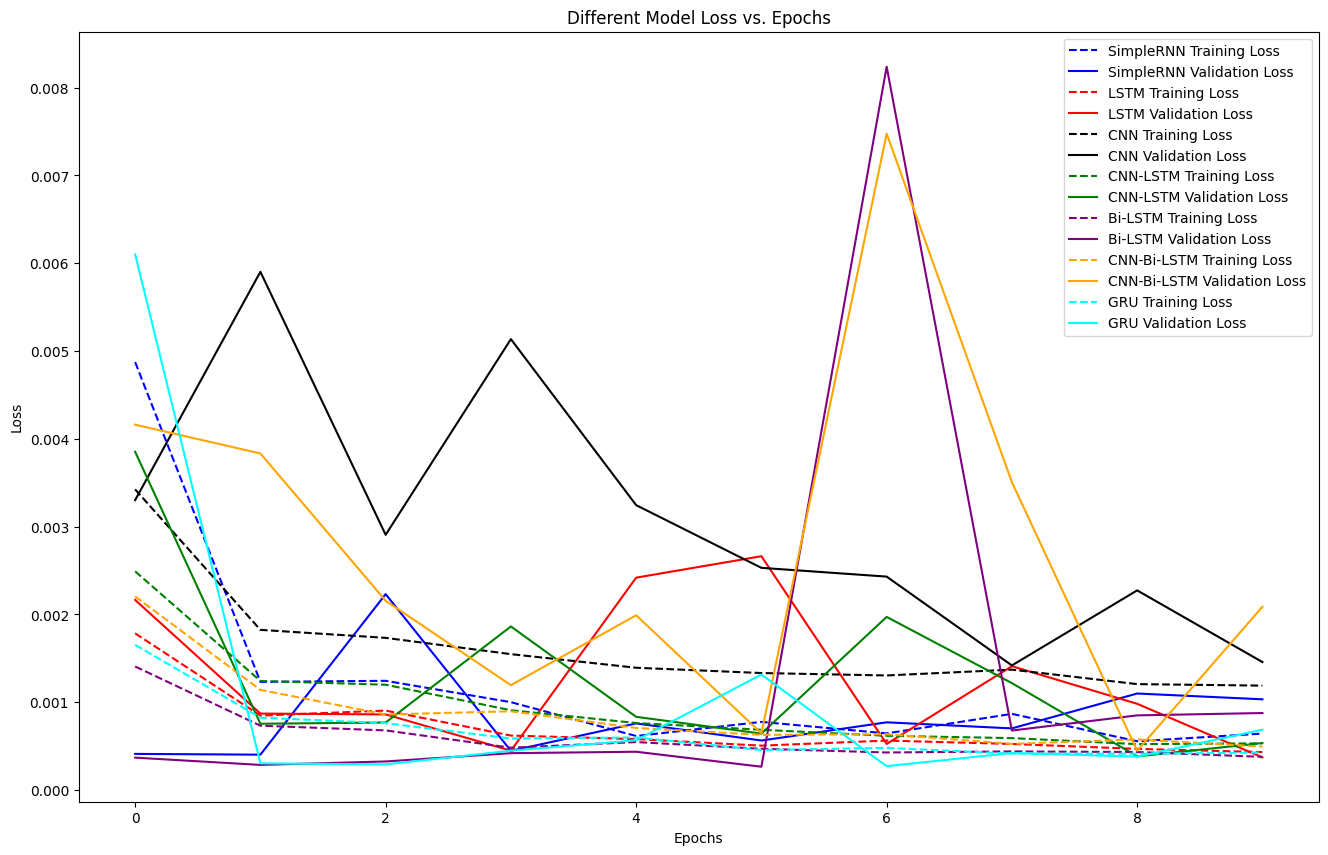

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(history_1.history['loss'], label='SimpleRNN Training Loss', linestyle='--', color='blue')
plt.plot(history_1.history['val_loss'], label='SimpleRNN Validation Loss', linestyle='-', color='blue')
plt.plot(history_2.history['loss'], label='LSTM Training Loss', linestyle='--', color='red')
plt.plot(history_2.history['val_loss'], label='LSTM Validation Loss', linestyle='-', color='red')
plt.plot(history_3.history['loss'], label='CNN Training Loss', linestyle='--', color='black')
plt.plot(history_3.history['val_loss'], label='CNN Validation Loss', linestyle='-', color='black')
plt.plot(history_4.history['loss'], label='CNN-LSTM Training Loss', linestyle='--', color='green')
plt.plot(history_4.history['val_loss'], label='CNN-LSTM Validation Loss', linestyle='-', color='green')
plt.plot(history_5.history['loss'], label='Bi-LSTM Training Loss', linestyle='--', color='purple')
plt.plot(history_5.history['val_loss'], label='Bi-LSTM Validation Loss', linestyle='-', color='purple')
plt.plot(history_6.history['loss'], label='CNN-Bi-LSTM Training Loss', linestyle='--', color='orange')
plt.plot(history_6.history['val_loss'], label='CNN-Bi-LSTM Validation Loss', linestyle='-', color='orange')
plt.plot(history_7.history['loss'], label='GRU Training Loss', linestyle='--', color='cyan')
plt.plot(history_7.history['val_loss'], label='GRU Validation Loss', linestyle='-', color='cyan')
#plt.axhline(y=rmse_svm, color='cyan', linestyle='-', label='SVM Loss')

plt.title('Different Model Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def calculate_r2(y_true, predictions):
    r2 = r2_score(y_true, predictions)
    adjacent_r2 = r2_score(y_true[:-1], predictions[1:])
    return r2, adjacent_r2

# Calculating R-squared
r2_1, adjacent_r2_1 = calculate_r2(y_test, predictions_1)
r2_2, adjacent_r2_2 = calculate_r2(y_test, predictions_2)
r2_3, adjacent_r2_3 = calculate_r2(y_test, predictions_3)
r2_4, adjacent_r2_4 = calculate_r2(y_test, predictions_4)
r2_5, adjacent_r2_5 = calculate_r2(y_test, predictions_5)
r2_6, adjacent_r2_6 = calculate_r2(y_test, predictions_6)
r2_7, adjacent_r2_7 = calculate_r2(y_test, predictions_7)
r2_rf, adjacent_r2_rf = calculate_r2(y_test, predictions_rf)
r2_svm, adjacent_r2_svm = calculate_r2(y_test, predictions_svm)

# Print R-squared errors
print("R^2 results")
print("RNN Model:", r2_1)
print("LSTM Model:", r2_2)
print("CNN Model:", r2_3)
print("CNN-LSTM Model:", r2_4)
print("Bi-LSTM Model:", r2_5)
print("CNN-BiLSTM Model:", r2_6)
print("GRU Model:", r2_7)
print("Random Forest Model:", r2_rf)
print("SVM Model:", r2_svm)

# Print adjacent R-squared errors
print("\nAdjacent R^2 results")
print("RNN Model:", adjacent_r2_1)
print("LSTM Model:", adjacent_r2_2)
print("CNN Model:", adjacent_r2_3)
print("CNN-LSTM Model:", adjacent_r2_4)
print("Bi-LSTM Model:", adjacent_r2_5)
print("CNN-BiLSTM Model:", adjacent_r2_6)
print("GRU Model:", adjacent_r2_7)
print("Random Forest Model:", adjacent_r2_rf)
print("SVM Model:", adjacent_r2_svm)

R^2 results
RNN Model: 0.9741020895349333
LSTM Model: 0.9900319006709591
CNN Model: 0.9536549294740789
CNN-LSTM Model: 0.9862718737104608
Bi-LSTM Model: 0.9784832146051721
CNN-BiLSTM Model: 0.9426496610825915
GRU Model: 0.9818418805274431
Random Forest Model: 0.9584832107158742
SVM Model: 0.8093486026167921

Adjacent R^2 results
RNN Model: 0.9766564432750012
LSTM Model: 0.9941713031014142
CNN Model: 0.9585244516448271
CNN-LSTM Model: 0.9902238559661383
Bi-LSTM Model: 0.9837474878245727
CNN-BiLSTM Model: 0.9449342758795279
GRU Model: 0.985433422507201
Random Forest Model: 0.961368432749857
SVM Model: 0.8090646574153572


In [ ]:
# Calculating MAE
mae_1 = mean_absolute_error(y_test, predictions_1)
mae_2 = mean_absolute_error(y_test, predictions_2)
mae_3 = mean_absolute_error(y_test, predictions_3)
mae_4 = mean_absolute_error(y_test, predictions_4)
mae_5 = mean_absolute_error(y_test, predictions_5)
mae_6 = mean_absolute_error(y_test, predictions_6)
mae_7 = mean_absolute_error(y_test, predictions_7)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mae_svm = mean_absolute_error(y_test, predictions_svm)

# Print MAE for each model
print("MAE results")
print("RNN Model:", mae_1)
print("LSTM Model:", mae_2)
print("CNN Model:", mae_3)
print("CNN-LSTM Model:", mae_4)
print("Bi-LSTM Model:", mae_5)
print("CNN-BiLSTM Model:", mae_6)
print("GRU Model:", mae_7)
print("Random Forest Model:", mae_rf)
print("SVM Model:", mae_svm)

# Calculating MAPE for each model
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_1 = mean_absolute_percentage_error(y_test, predictions_1)
mape_2 = mean_absolute_percentage_error(y_test, predictions_2)
mape_3 = mean_absolute_percentage_error(y_test, predictions_3)
mape_4 = mean_absolute_percentage_error(y_test, predictions_4)
mape_5 = mean_absolute_percentage_error(y_test, predictions_5)
mape_6 = mean_absolute_percentage_error(y_test, predictions_6)
mape_7 = mean_absolute_percentage_error(y_test, predictions_7)
mape_rf = mean_absolute_percentage_error(y_test, predictions_rf)
mape_svm = mean_absolute_percentage_error(y_test, predictions_svm)

# Print MAPE for each model
print("\nMAPE results")
print("RNN Model:", mape_1)
print("LSTM Model:", mape_2)
print("CNN Model:", mape_3)
print("CNN-LSTM Model:", mape_4)
print("Bi-LSTM Model:", mape_5)
print("CNN-BiLSTM Model:", mape_6)
print("GRU Model:", mape_7)
print("Random Forest Model:", mape_rf)
print("SVM Model:", mape_svm)

MAE results
RNN Model: 1991.353088695035
LSTM Model: 1121.310380432624
CNN Model: 2357.21840114805
CNN-LSTM Model: 1085.1414051156917
Bi-LSTM Model: 1668.6084030593972
CNN-BiLSTM Model: 3182.319960379433
GRU Model: 1684.036599251773
Random Forest Model: 2387.324881135885
SVM Model: 4976.4688784089585

MAPE results
RNN Model: 6.5331308942201485
LSTM Model: 3.8092541282859957
CNN Model: 8.394331337309255
CNN-LSTM Model: 3.215923572390319
Bi-LSTM Model: 5.207509415932854
CNN-BiLSTM Model: 12.170207439794012
GRU Model: 5.911586222111452
Random Forest Model: 9.374246649380806
SVM Model: 17.289798189379265


In [ ]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.fit_transform(last_60_days)
new_X_test = []
new_X_test.append(last_60_days_scaled)
new_X_test = np.array(new_X_test)
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))

pred_price_1 = model_1.predict(new_X_test)
pred_price_1 = scaler.inverse_transform(pred_price_1)

pred_price_2 = model_2.predict(new_X_test)
pred_price_2 = scaler.inverse_transform(pred_price_2)

pred_price_3 = model_3.predict(new_X_test)
pred_price_3 = scaler.inverse_transform(pred_price_3)

pred_price_4 = model_4.predict(new_X_test)
pred_price_4 = scaler.inverse_transform(pred_price_4)

pred_price_5 = model_5.predict(new_X_test)
pred_price_5 = scaler.inverse_transform(pred_price_5)

pred_price_6 = model_6.predict(new_X_test)
pred_price_6 = scaler.inverse_transform(pred_price_6)

pred_price_7 = model_7.predict(new_X_test)
pred_price_7 = scaler.inverse_transform(pred_price_7)

pred_price_rf = rf_model.predict(new_X_test.reshape(1, sequence_length))
pred_price_rf = scaler.inverse_transform(pred_price_rf.reshape(-1, 1))

# Reshape last_60_days_scaled to have 60 features
last_60_days_scaled_reshape = last_60_days_scaled.reshape(1, -1)

pred_price_svm = svm_model.predict(last_60_days_scaled_reshape)
pred_price_svm = scaler.inverse_transform(pred_price_svm.reshape(-1, 1))

print("RNN Model predicted price:", pred_price_1)
print("LSTM Model predicted price:", pred_price_2)
print("CNN Model predicted price:", pred_price_3)
print("CNN-LSTM Model predicted price:", pred_price_4)
print("Bi-LSTM Model predicted price:", pred_price_5)
print("CNN-BiLSTM Model predicted price:", pred_price_6)
print("GRU Model predicted price:", pred_price_7)
print("Random Forest Model predicted price:", pred_price_rf)
print("SVM Model predicted price:", pred_price_svm)

1/1 [==============================] - 0s 19ms/step
RNN Model predicted price: [[59906.29]]
LSTM Model predicted price: [[61404.08]]
CNN Model predicted price: [[64658.02]]
CNN-LSTM Model predicted price: [[61761.805]]
Bi-LSTM Model predicted price: [[61108.324]]
CNN-BiLSTM Model predicted price: [[62571.754]]
GRU Model predicted price: [[61977.63]]
Random Forest Model predicted price: [[62088.98051933]]
SVM Model predicted price: [[64188.92637955]]


## **Sentiment Analysis**

---

Web scraping & subjectivity and polarity

In [ ]:
# Importing the essential libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import spacy
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

In [ ]:
!pip install pattern
from pattern.en import sentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.8/348.8 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=80bcc194038318ef593b9a011921bca5f96d79332d6ccb54f1c3aafec0bb62e2
  Stored in direc

In [ ]:
# List of Bitcoin news URLs
urls = [
    "https://www.coindesk.com/",
    "https://cointelegraph.com/",
    "https://news.bitcoin.com/",
    "https://www.coindesk.com/",
    "https://bitcoinmagazine.com/",
    "https://www.cnbc.com/bitcoin/"
]

In [ ]:
# Brand or keyword
brand = "Bitcoin"

# Empty list to hold the text from each URL
text_list = []

for url in urls:
    r = requests.get(url)  # Make a GET request to the URL
    r.encoding = 'utf-8'   # Set the correct text encoding of the HTML page
    html = r.text          # Extract the HTML from the request object
    soup = BeautifulSoup(html, 'html.parser')  # Create a BeautifulSoup object from the HTML
    text = soup.get_text()  # Get the text out of the soup
    text_list.append(text)  # Add the text to the list

In [ ]:
clean_text = ' '.join(text_list)  # Combine the text from all URLs into a single string
clean_text = clean_text.replace("\n", " ")
clean_text = clean_text.replace("/", " ")
clean_text = ''.join([c for c in clean_text if c != "\'"])

In [ ]:
# Split the text into sentences
sentence = []
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
# Calculate sentiment polarity and subjectivity of the sentences using TextBlob and Pattern libraries
textblob_sentiment = []
pattern_sentiment = []

for s in sentence:
    # TextBlob
    txt = TextBlob(s)
    p_tb = txt.sentiment.polarity
    sub_tb = txt.sentiment.subjectivity
    textblob_sentiment.append([s, p_tb, sub_tb])

    # Pattern
    res = sentiment(s)
    p_pt = res[0]
    sub_pt = res[1]
    pattern_sentiment.append([s, p_pt, sub_pt])

In [ ]:
# Store sentiment scores in DataFrames
df_textblob = pd.DataFrame(textblob_sentiment, columns=['Sentence', 'Polarity_TB', 'Subjectivity_TB'])
df_pattern = pd.DataFrame(pattern_sentiment, columns=['Sentence', 'Polarity_PT', 'Subjectivity_PT'])


In [ ]:
df_textblob.head()

,Sentence,Polarity_TB,Subjectivity_TB
0,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",0.028788,0.300000
1,Crypto Industry Rallies Behind House Bill as I...,-0.100000,0.425000
2,"By Jesse HamiltonMay 17, 2024 at 2:44 p.m. UTC...",0.250000,0.411111
3,Learn moreJoin,0.000000,0.000000
4,"WaitlistBy signing up, you will receive emails...",0.000000,0.000000


Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

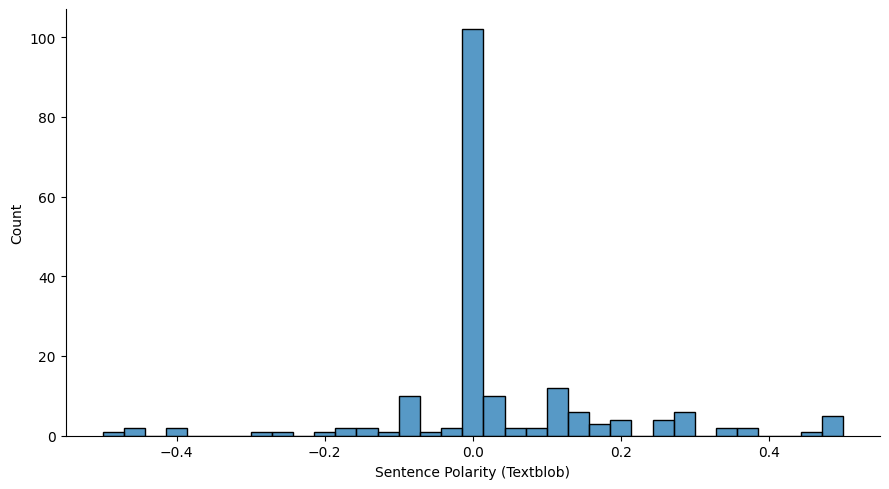

In [ ]:
sns.displot(df_textblob["Polarity_TB"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

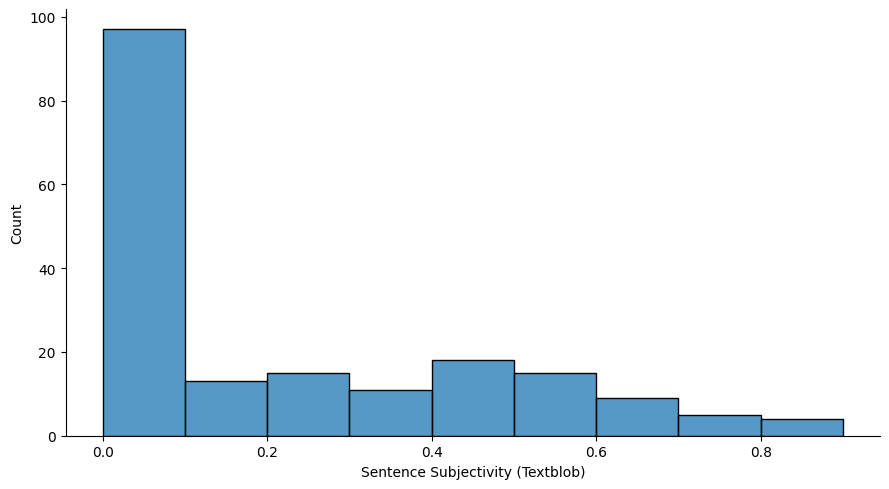

In [ ]:
sns.displot(df_textblob["Subjectivity_TB"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [ ]:
df_pattern.head()

,Sentence,Polarity_PT,Subjectivity_PT
0,"CoinDesk: Bitcoin, Ethereum, Crypto News and P...",0.028788,0.300000
1,Crypto Industry Rallies Behind House Bill as I...,-0.100000,0.425000
2,"By Jesse HamiltonMay 17, 2024 at 2:44 p.m. UTC...",0.250000,0.411111
3,Learn moreJoin,0.000000,0.000000
4,"WaitlistBy signing up, you will receive emails...",0.000000,0.000000


Text(0.5, 9.444444444444438, 'Sentence Polarity (Pattern)')

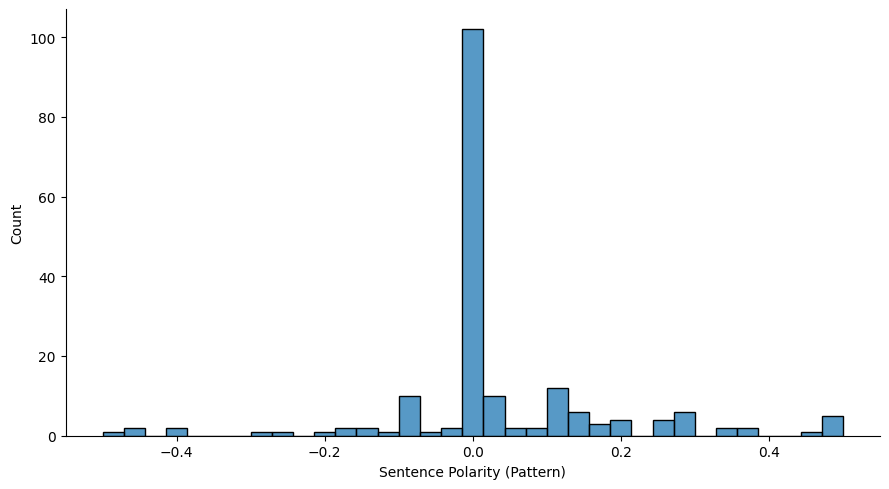

In [ ]:
sns.displot(df_pattern["Polarity_PT"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Pattern)')

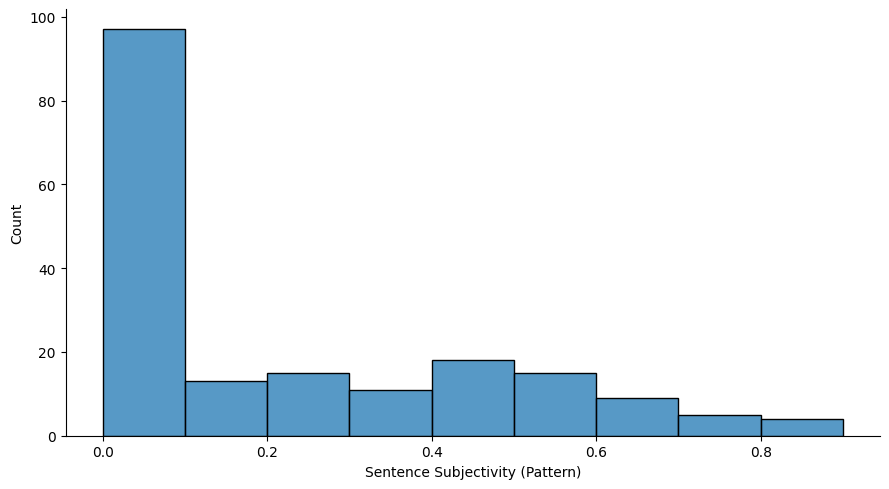

In [ ]:
sns.displot(df_pattern["Subjectivity_PT"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

In [ ]:
num_positive_sentences = len(df_textblob[df_textblob['Polarity_TB'] > 0])
num_negative_sentences = len(df_textblob[df_textblob['Polarity_TB'] < 0])
percentage_positive_sentences = (num_positive_sentences / len(df_textblob)) * 100
percentage_negative_sentences = (num_negative_sentences / len(df_textblob)) * 100

print("\nBitcoin Sentiment Analysis (TextBlob):")
print("Number of positive sentiment sentences:", num_positive_sentences)
print("Number of negative sentiment sentences:", num_negative_sentences)
print("Percentage of positive sentiment sentences: {:.2f}%".format(percentage_positive_sentences))
print("Percentage of negative sentiment sentences: {:.2f}%".format(percentage_negative_sentences))


Bitcoin Sentiment Analysis (TextBlob):
Number of positive sentiment sentences: 59
Number of negative sentiment sentences: 26
Percentage of positive sentiment sentences: 31.55%
Percentage of negative sentiment sentences: 13.90%


In [ ]:
num_positive_sentences_pt = len(df_pattern[df_pattern['Polarity_PT'] > 0])
num_negative_sentences_pt = len(df_pattern[df_pattern['Polarity_PT'] < 0])
percentage_positive_sentences_pt = (num_positive_sentences_pt / len(df_pattern)) * 100
percentage_negative_sentences_pt = (num_negative_sentences_pt / len(df_pattern)) * 100

print("\nBitcoin Sentiment Analysis (Pattern):")
print("Number of positive sentiment sentences:", num_positive_sentences_pt)
print("Number of negative sentiment sentences:", num_negative_sentences_pt)
print("Percentage of positive sentiment sentences: {:.2f}%".format(percentage_positive_sentences_pt))
print("Percentage of negative sentiment sentences: {:.2f}%".format(percentage_negative_sentences_pt))


Bitcoin Sentiment Analysis (Pattern):
Number of positive sentiment sentences: 59
Number of negative sentiment sentences: 26
Percentage of positive sentiment sentences: 31.55%
Percentage of negative sentiment sentences: 13.90%


**Tweets**

In [ ]:
  import pandas as pd
  from textblob import TextBlob
  from sklearn.metrics import mean_absolute_error, mean_squared_error
  from math import sqrt

  df_tweets = pd.read_csv("Tweets.csv")

  df_high_followers = df_tweets[df_tweets['Followers'] >= 1000000]

  positive_sentiments = []
  negative_sentiments = []

  for tweet in df_high_followers['Text']:
      analysis = TextBlob(tweet)
      polarity = analysis.sentiment.polarity

      # Determine if sentiment is positive or negative
      if polarity > 0:
          positive_sentiments.append(polarity)
      elif polarity < 0:
          negative_sentiments.append(polarity)

  total_tweets = len(positive_sentiments) + len(negative_sentiments)
  positive_percentage = (len(positive_sentiments) / total_tweets) * 100
  negative_percentage = (len(negative_sentiments) / total_tweets) * 100

  print("Sentiment Analysis for Tweets with Followers >= 1,000,000:")
  print("Number of Positive Sentiments:", len(positive_sentiments))
  print("Number of Negative Sentiments:", len(negative_sentiments))
  print("Percentage of Positive Sentiments: {:.2f}%".format(positive_percentage))
  print("Percentage of Negative Sentiments: {:.2f}%".format(negative_percentage))

Sentiment Analysis for Tweets with Followers >= 1,000,000:
Number of Positive Sentiments: 13
Number of Negative Sentiments: 20
Percentage of Positive Sentiments: 39.39%
Percentage of Negative Sentiments: 60.61%


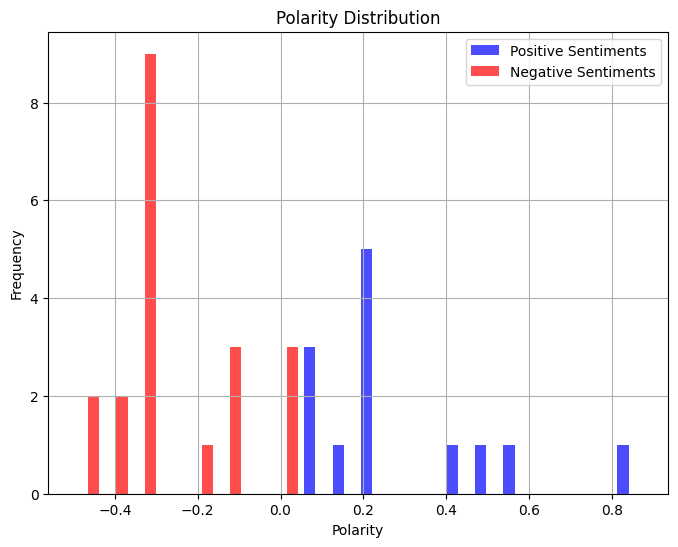

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([positive_sentiments, negative_sentiments], bins=20, color=['blue', 'red'], alpha=0.7, label=['Positive Sentiments', 'Negative Sentiments'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Polarity Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
positive_weight = 0.5
negative_weight = 0.5

sentiment_score = (positive_weight * positive_percentage) - (negative_weight * negative_percentage)

predicted_prices = [pred_price_1, pred_price_2, pred_price_3, pred_price_4, pred_price_5, pred_price_6,
                    pred_price_7, pred_price_rf, pred_price_svm]

model_names = ["RNN", "LSTM", "CNN", "CNN-LSTM", "Bi-LSTM", "CNN-BiLSTM", "GRU", "RF", "SVM"]

adjusted_prices = []
for price in predicted_prices:
    if sentiment_score >= 0:
        adjusted_price = price + (abs(sentiment_score) * 0.01 * price)
    else:
        adjusted_price = price - (abs(sentiment_score) * 0.01 * price)
    adjusted_prices.append(adjusted_price)

adjusted_prices_with_names = zip(model_names, adjusted_prices)

for i, (model_name, price) in enumerate(adjusted_prices_with_names, start=1):
    print(f"Adjusted Price for {model_name}: {float(price):.3f}")

Adjusted Price for RNN: 53552.590
Adjusted Price for LSTM: 54891.523
Adjusted Price for CNN: 57800.352
Adjusted Price for CNN-LSTM: 55211.309
Adjusted Price for Bi-LSTM: 54627.137
Adjusted Price for CNN-BiLSTM: 55935.355
Adjusted Price for GRU: 55404.242
Adjusted Price for RF: 55503.786
Adjusted Price for SVM: 57381.010


<ipython-input-72-20dc911fb919>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Adjusted Price for {model_name}: {float(price):.3f}")
